In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset:

In [7]:
house_data= pd.read_excel('house_price.xlsx')
house_data

,Neighborhood,HouseStyle,SaleCondition,LotFrontage,LotArea,OverallQual,YearBuilt,GrLivArea,TotRmsAbvGrd,GarageArea,GarageCars,SalePrice
0,CollgCr,2Story,Normal,65.0,8450,7,2003,1710,8,548,2,208500
1,Veenker,1Story,Normal,80.0,9600,6,1976,1262,6,460,2,181500
2,CollgCr,2Story,Normal,68.0,11250,7,2001,1786,6,608,2,223500
3,Crawfor,2Story,Abnorml,60.0,9550,7,1915,1717,7,642,3,140000
4,NoRidge,2Story,Normal,84.0,14260,8,2000,2198,9,836,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
495,IDOTRR,1Story,Abnorml,60.0,7879,4,1920,720,4,0,0,34900
496,NoRidge,1Story,Normal,NaN,12692,8,1992,3228,10,546,2,430000
497,BrkSide,1.5Fin,Normal,60.0,9120,7,1925,1820,8,240,1,184000
498,NaN,1Story,Normal,65.0,7800,5,1967,899,5,288,1,130000


# Dataset Selection:

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Neighborhood   485 non-null    object 
 1   HouseStyle     500 non-null    object 
 2   SaleCondition  500 non-null    object 
 3   LotFrontage    413 non-null    float64
 4   LotArea        500 non-null    int64  
 5   OverallQual    500 non-null    int64  
 6   YearBuilt      500 non-null    int64  
 7   GrLivArea      500 non-null    int64  
 8   TotRmsAbvGrd   500 non-null    int64  
 9   GarageArea     500 non-null    int64  
 10  GarageCars     500 non-null    int64  
 11  SalePrice      500 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 47.0+ KB


# Data Cleaning (20% of the grade):

In [11]:
house_data['LotFrontage'].fillna(house_data['LotFrontage'].median(), inplace=True)
house_data['Neighborhood'].fillna(house_data['Neighborhood'].mode()[0], inplace=True)
house_data['LotFrontage'] = house_data['LotFrontage'].fillna(0).astype('int64')
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Neighborhood   500 non-null    object
 1   HouseStyle     500 non-null    object
 2   SaleCondition  500 non-null    object
 3   LotFrontage    500 non-null    int64 
 4   LotArea        500 non-null    int64 
 5   OverallQual    500 non-null    int64 
 6   YearBuilt      500 non-null    int64 
 7   GrLivArea      500 non-null    int64 
 8   TotRmsAbvGrd   500 non-null    int64 
 9   GarageArea     500 non-null    int64 
 10  GarageCars     500 non-null    int64 
 11  SalePrice      500 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 47.0+ KB


In [13]:
numerical_columns = house_data.select_dtypes(include=['float64', 'int64']).columns
outliers_count = {}
for col in numerical_columns:
    Q1, Q3 = house_data[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers_count[col] = ((house_data[col] < lower) | (house_data[col] > upper)).sum()

house_data = house_data.drop_duplicates()
print(house_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Neighborhood   500 non-null    object
 1   HouseStyle     500 non-null    object
 2   SaleCondition  500 non-null    object
 3   LotFrontage    500 non-null    int64 
 4   LotArea        500 non-null    int64 
 5   OverallQual    500 non-null    int64 
 6   YearBuilt      500 non-null    int64 
 7   GrLivArea      500 non-null    int64 
 8   TotRmsAbvGrd   500 non-null    int64 
 9   GarageArea     500 non-null    int64 
 10  GarageCars     500 non-null    int64 
 11  SalePrice      500 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 47.0+ KB
None


# Exploratory Data Analysis (EDA) (30% of the grade):

In [13]:
numeric_columns = house_data.select_dtypes(include=['float64', 'int64']).columns

numeric_summary = pd.DataFrame({
    "Mean": house_data[numeric_columns].mean(),
    "Median": house_data[numeric_columns].median(),
    "Mode": house_data[numeric_columns].mode().iloc[0],
    "Std Dev": house_data[numeric_columns].std()
})
print("Сандық мәліметтерге арналған сипаттамалық статистика:")
print(numeric_summary)

Сандық мәліметтерге арналған сипаттамалық статистика:
                    Mean    Median      Mode       Std Dev
LotFrontage       70.810      70.0      70.0     21.043183
LotArea        11155.090    9378.5    7200.0  14527.955519
OverallQual        6.148       6.0       6.0      1.361545
YearBuilt       1971.280    1973.0    2004.0     29.882093
GrLivArea       1517.632    1469.0     864.0    496.919533
TotRmsAbvGrd       6.496       6.0       6.0      1.542317
GarageArea       462.654     470.5       0.0    207.859735
GarageCars         1.744       2.0       2.0      0.756047
SalePrice     182587.004  165550.0  115000.0  78562.528318


In [17]:
categorical_columns = house_data.select_dtypes(include=['object']).columns

print("\nКатегориялық айнымалылар жиілігі:")
for col in categorical_columns:
    print(f"\n{col} бағанындағы жиілік:\n", house_data[col].value_counts())


Категориялық айнымалылар жиілігі:

Neighborhood бағанындағы жиілік:
 Neighborhood
NAmes      86
CollgCr    53
OldTown    44
NridgHt    33
Edwards    30
Gilbert    28
Somerst    25
SawyerW    23
Sawyer     20
NWAmes     19
BrkSide    19
IDOTRR     18
Mitchel    16
Crawfor    13
ClearCr    13
Timber     10
NoRidge    10
MeadowV     8
StoneBr     8
BrDale      7
SWISU       6
Blmngtn     5
Veenker     4
NPkVill     2
Name: count, dtype: int64

HouseStyle бағанындағы жиілік:
 HouseStyle
1Story    251
2Story    152
1.5Fin     57
SLvl       17
1.5Unf      8
SFoyer      8
2.5Fin      4
2.5Unf      3
Name: count, dtype: int64

SaleCondition бағанындағы жиілік:
 SaleCondition
Normal     410
Partial     46
Abnorml     31
Family       6
Alloca       4
AdjLand      3
Name: count, dtype: int64


In [19]:

for col in categorical_columns:
    grouped_summary = house_data.groupby(col)['SalePrice'].mean().sort_values()
    print(f"\n{col} бойынша орташа SalePrice:\n", grouped_summary)


Neighborhood бойынша орташа SalePrice:
 Neighborhood
IDOTRR     102211.111111
BrDale     103985.714286
MeadowV    109612.500000
Edwards    121588.333333
OldTown    129412.409091
BrkSide    132509.210526
Sawyer     134931.650000
NPkVill    138250.000000
SWISU      142066.666667
NAmes      156166.534884
Mitchel    168217.875000
Blmngtn    180596.000000
SawyerW    186236.391304
Gilbert    189672.107143
NWAmes     196968.421053
CollgCr    199432.641509
Crawfor    204003.846154
ClearCr    215533.230769
Timber     225735.000000
Veenker    228375.000000
Somerst    239775.400000
NoRidge    303600.000000
NridgHt    329540.363636
StoneBr    337559.375000
Name: SalePrice, dtype: float64

HouseStyle бойынша орташа SalePrice:
 HouseStyle
1.5Unf    107700.000000
1.5Fin    138952.070175
SFoyer    146642.125000
2.5Unf    149800.000000
SLvl      166029.411765
1Story    177955.709163
2Story    212804.039474
2.5Fin    263375.000000
Name: SalePrice, dtype: float64

SaleCondition бойынша орташа SalePrice:

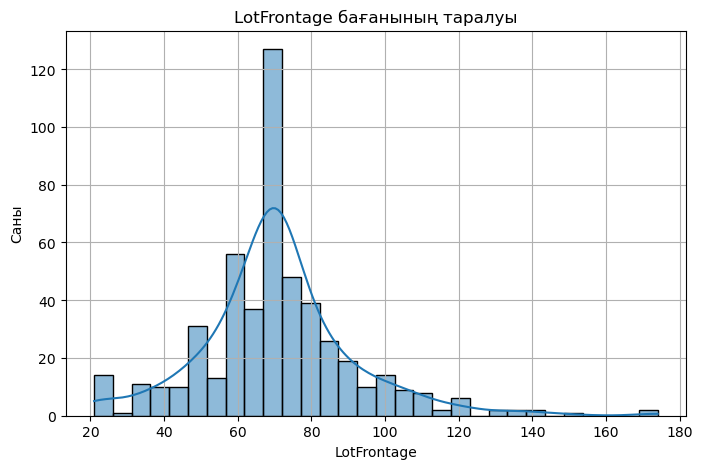

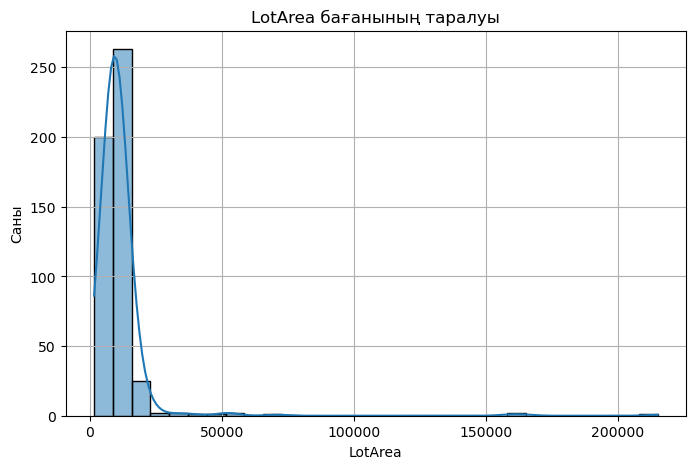

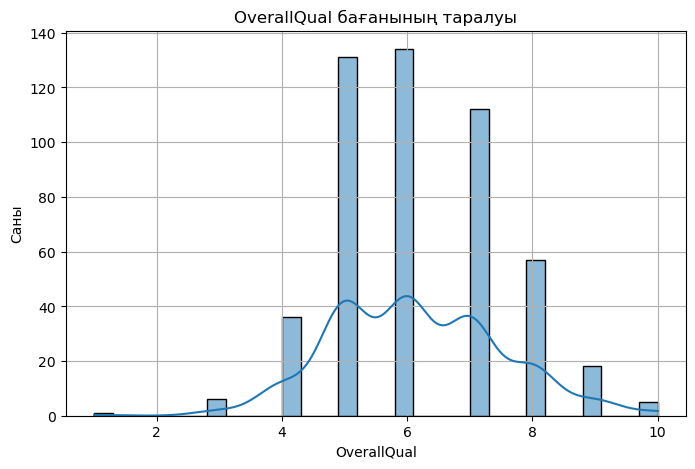

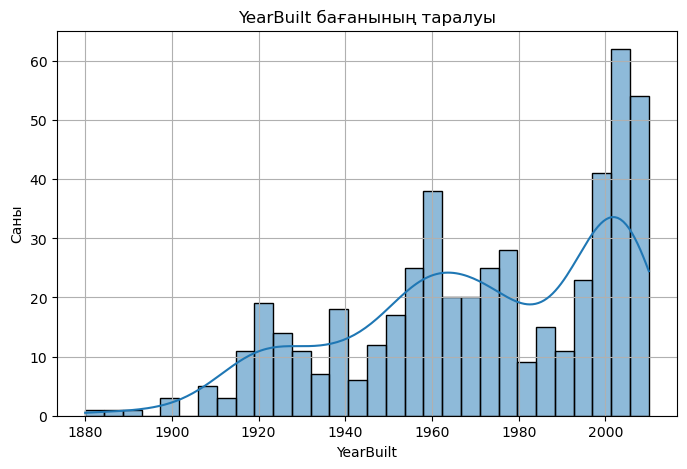

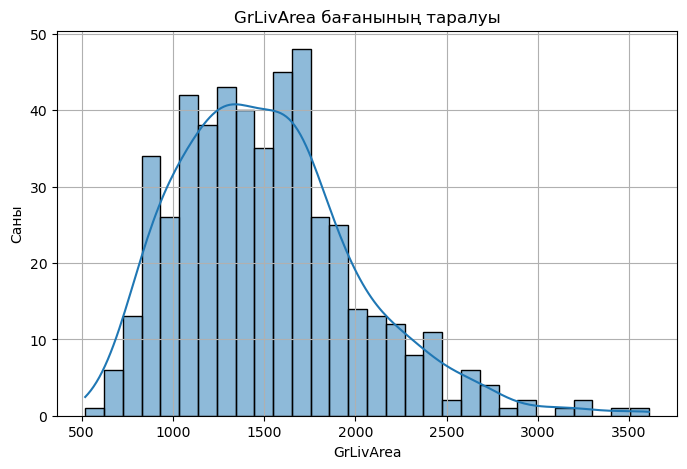

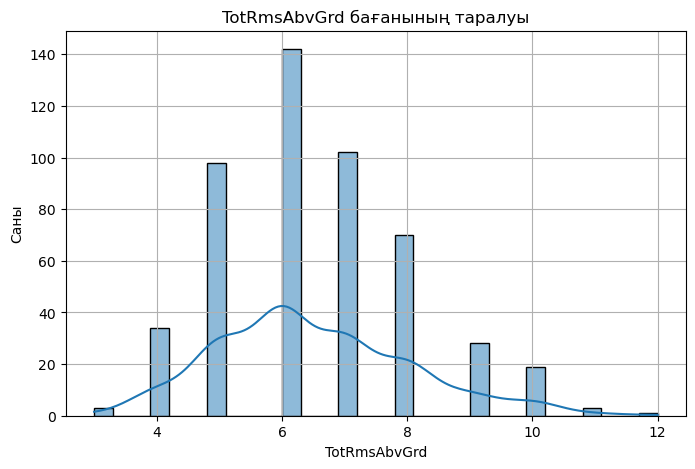

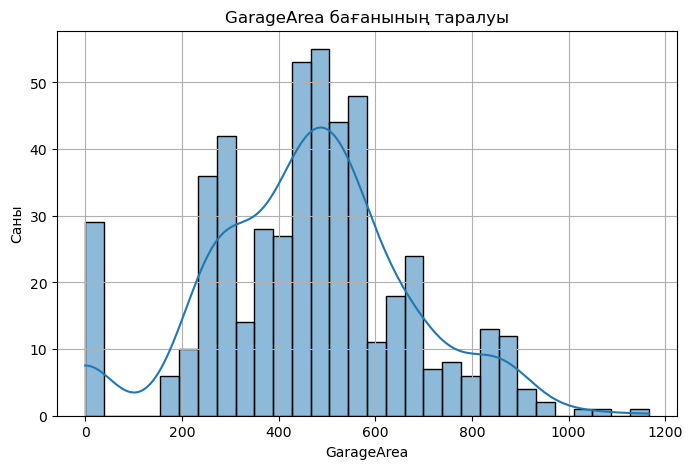

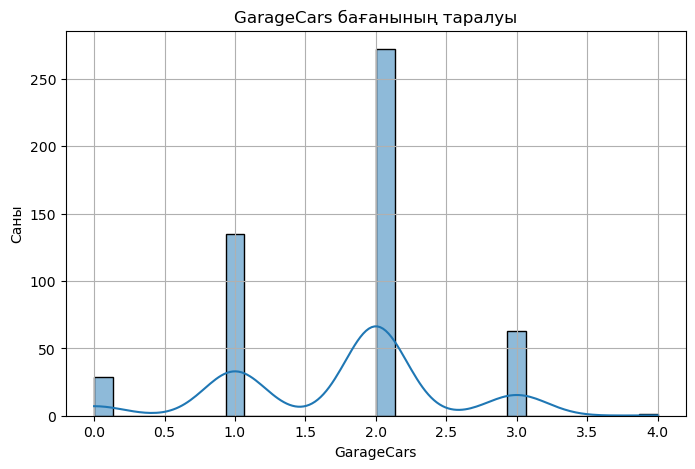

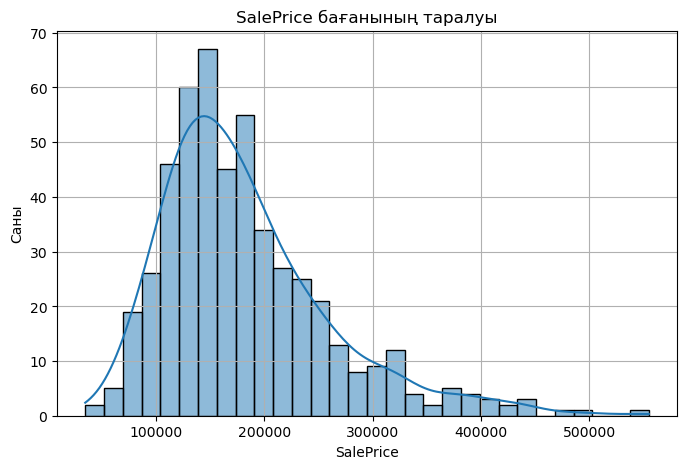

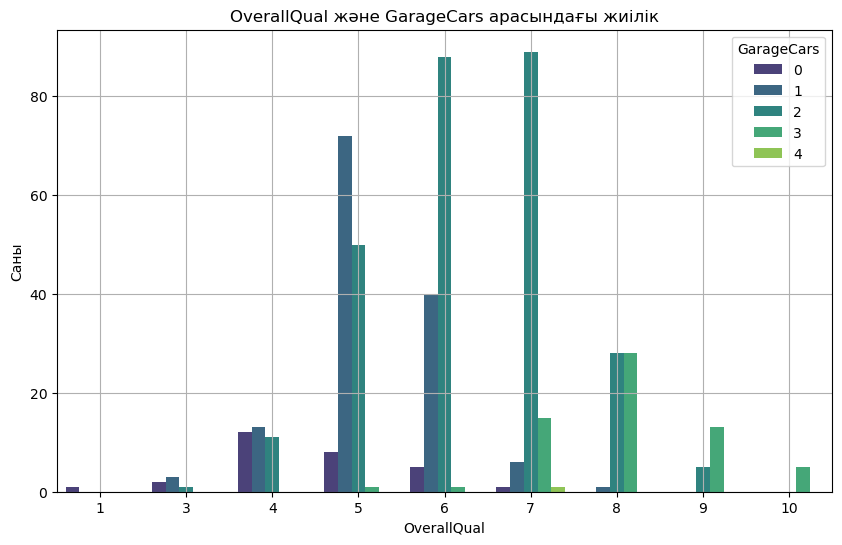

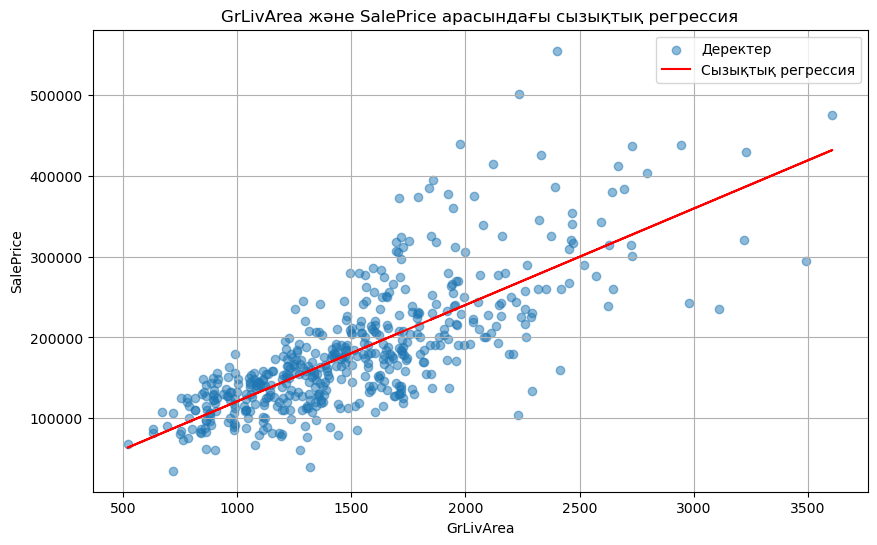

In [27]:
from sklearn.linear_model import LinearRegression

numeric_columns = house_data.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(house_data[col], kde=True, bins=30)
    plt.title(f"{col} бағанының таралуы")
    plt.xlabel(col)
    plt.ylabel("Саны")
    plt.grid()
    plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(data=house_data, x='OverallQual', hue='GarageCars', palette='viridis')
plt.title("OverallQual және GarageCars арасындағы жиілік")
plt.xlabel("OverallQual")
plt.ylabel("Саны")
plt.legend(title="GarageCars")
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
X = house_data[['GrLivArea']].values.reshape(-1, 1)
y = house_data['SalePrice'].values

model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)
plt.scatter(house_data['GrLivArea'], house_data['SalePrice'], alpha=0.5, label='Деректер')
plt.plot(house_data['GrLivArea'], predictions, color='red', label='Сызықтық регрессия')
plt.title("GrLivArea және SalePrice арасындағы сызықтық регрессия")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.grid()
plt.show()

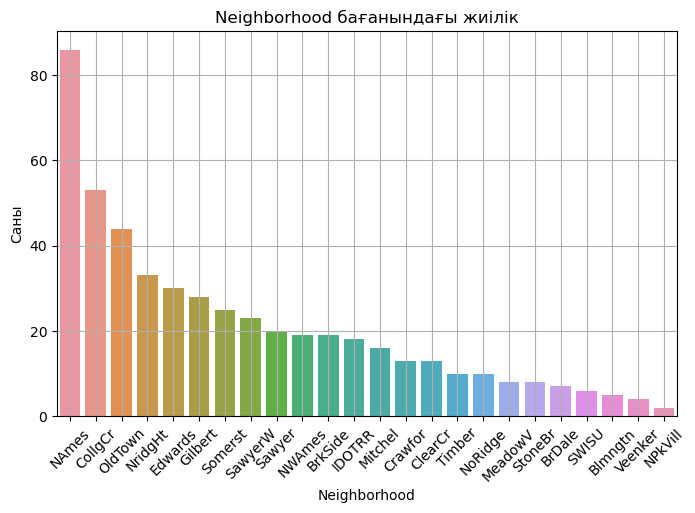

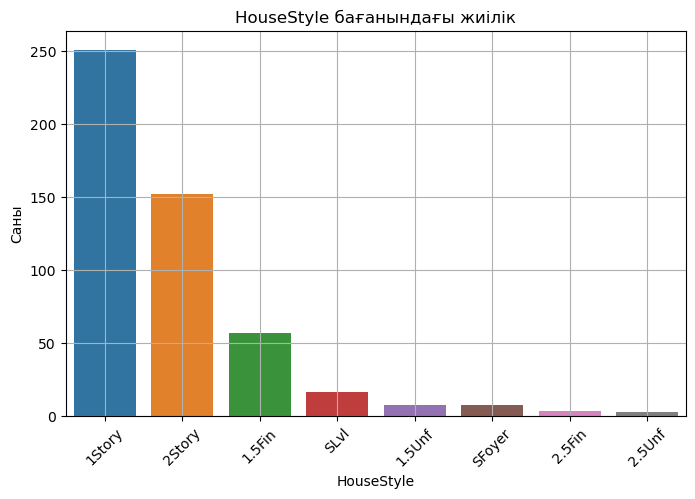

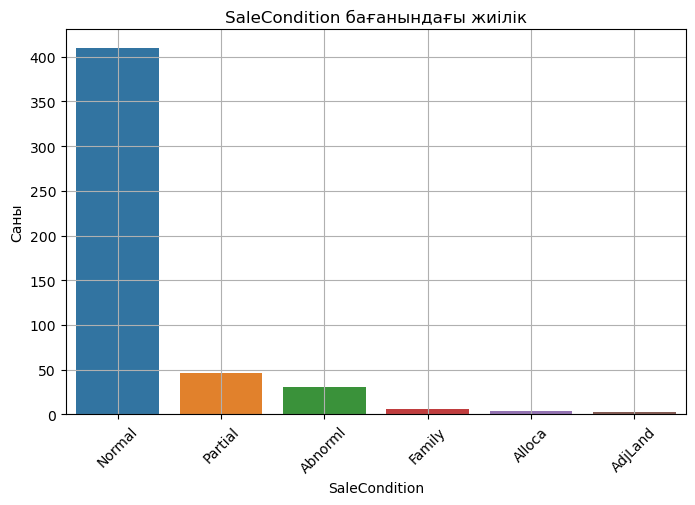

In [29]:

categorical_columns = house_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=house_data, x=col, order=house_data[col].value_counts().index)
    plt.title(f"{col} бағанындағы жиілік")
    plt.xticks(rotation=45)
    plt.ylabel("Саны")
    plt.xlabel(col)
    plt.grid()
    plt.show()

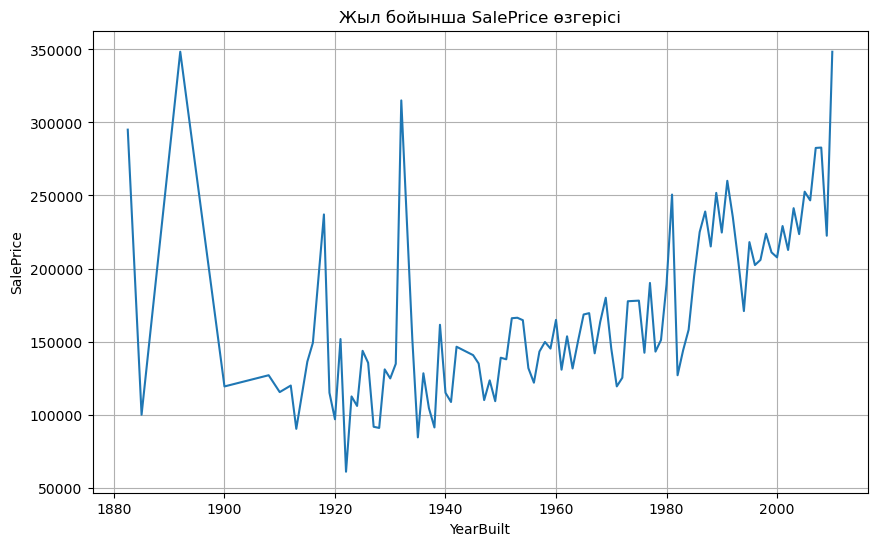

In [31]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=house_data, x='YearBuilt', y='SalePrice', errorbar=None)
plt.title("Жыл бойынша SalePrice өзгерісі")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

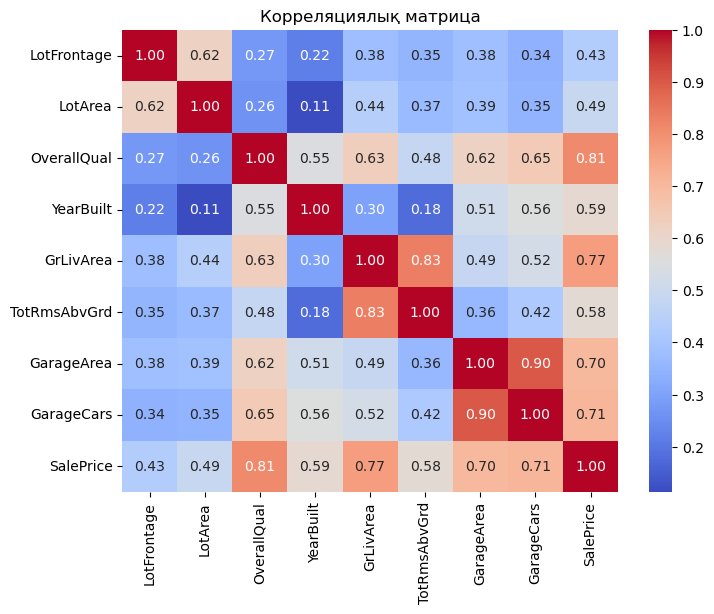

In [33]:
plt.figure(figsize=(8, 6))
correlation_matrix = house_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляциялық матрица")
plt.show()

# Data Transformation and Feature Engineering (20% of the grade):

In [27]:

house_data['GrLiv_Lot_Ratio'] = house_data['GrLivArea'] / house_data['LotArea']

house_data['Area_per_Room'] = house_data['GrLivArea'] / house_data['TotRmsAbvGrd']

house_data['GarageArea_per_Car'] = house_data['GarageArea'] / house_data['GarageCars']

print(house_data[['GrLiv_Lot_Ratio', 'Area_per_Room', 'GarageArea_per_Car']].head())


quality_categories = []
for value in house_data['OverallQual']:
    if value <= 4:
        quality_categories.append('Low')
    elif value <= 7:
        quality_categories.append('Medium')
    else:
        quality_categories.append('High')

house_data['QualityCategory'] = quality_categories
print(house_data[['QualityCategory','OverallQual']].head())

   GrLiv_Lot_Ratio  Area_per_Room  GarageArea_per_Car
0         0.202367     213.750000          274.000000
1         0.131458     210.333333          230.000000
2         0.158756     297.666667          304.000000
3         0.179791     245.285714          214.000000
4         0.154137     244.222222          278.666667
  QualityCategory  OverallQual
0          Medium          7.0
1          Medium          6.0
2          Medium          7.0
3          Medium          7.0
4            High          8.0


In [25]:
house_data['House_Age'] = 2024 - house_data['YearBuilt']

house_data['Has_Garage'] = house_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
print(house_data[['YearBuilt', 'House_Age', 'Has_Garage']].head(7))

   YearBuilt  House_Age  Has_Garage
0     2003.0       21.0           1
1     1976.0       48.0           1
2     2001.0       23.0           1
3     1915.0      109.0           1
4     2000.0       24.0           1
5     1993.0       31.0           1
6     2004.0       20.0           1


In [39]:
high_price_houses = house_data[house_data['SalePrice'] > 200000]
print("SalePrice 200000-нан жоғары үйлер:")
print(high_price_houses[['SalePrice', 'GrLivArea', 'Neighborhood']].head())

new_houses = house_data[house_data['House_Age'] < 20]
print("\n20 жылдан жаңа үйлер:")
print(new_houses[['YearBuilt', 'House_Age', 'SalePrice']].head())


SalePrice 200000-нан жоғары үйлер:
    SalePrice  GrLivArea Neighborhood
0    208500.0     1710.0      CollgCr
2    223500.0     1786.0      CollgCr
4    250000.0     2198.0      NoRidge
6    307000.0     1694.0      Somerst
11   345000.0     2324.0      NridgHt

20 жылдан жаңа үйлер:
    YearBuilt  House_Age  SalePrice
11     2005.0       19.0   345000.0
13     2006.0       18.0   279500.0
20     2005.0       19.0   325300.0
25     2007.0       17.0   256300.0
27     2007.0       17.0   306000.0


In [41]:
sorted_by_price = house_data.sort_values(by='SalePrice', ascending=False)
print("SalePrice бойынша сұрыпталған үйлер:")
print(sorted_by_price[['SalePrice', 'Neighborhood', 'GrLivArea']].head())

sorted_by_age = house_data.sort_values(by='House_Age')
print("\nҮйдің жасы бойынша сұрыпталған үйлер:")
print(sorted_by_age[['YearBuilt', 'House_Age', 'SalePrice']].head())


SalePrice бойынша сұрыпталған үйлер:
     SalePrice Neighborhood  GrLivArea
481  348306.25      NridgHt     1792.0
185  348306.25      OldTown     2696.5
473  348306.25      NridgHt     1976.0
231  348306.25      NoRidge     2696.5
58   348306.25      StoneBr     2696.5

Үйдің жасы бойынша сұрыпталған үйлер:
     YearBuilt  House_Age  SalePrice
378     2010.0       14.0  348306.25
103     2009.0       15.0  198900.00
211     2009.0       15.0  186000.00
412     2009.0       15.0  222000.00
212     2009.0       15.0  252678.00


In [29]:
extra_data = pd.DataFrame({
    'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor'],
    'Avg_School_Rating': [8.5, 9.2, 7.8]
})


merged_data = pd.merge(house_data, extra_data, on='Neighborhood', how='left')

print("Біріктірілген деректер:")
print(merged_data[['Neighborhood', 'SalePrice', 'Avg_School_Rating']].head())

Біріктірілген деректер:
  Neighborhood  SalePrice  Avg_School_Rating
0      CollgCr   208500.0                8.5
1      Veenker   181500.0                9.2
2      CollgCr   223500.0                8.5
3      Crawfor   140000.0                7.8
4      NoRidge   250000.0                NaN


In [45]:
selected_columns = house_data.loc[:, ['Neighborhood', 'SalePrice', 'GrLivArea']]

selected_rows = house_data.iloc[0:5]

print("Таңдалған бағандар:")
print(selected_columns.head())
print("\nАлғашқы 5 жол:")
print(selected_rows)

Таңдалған бағандар:
  Neighborhood  SalePrice  GrLivArea
0      CollgCr   208500.0     1710.0
1      Veenker   181500.0     1262.0
2      CollgCr   223500.0     1786.0
3      Crawfor   140000.0     1717.0
4      NoRidge   250000.0     2198.0

Алғашқы 5 жол:
  Neighborhood HouseStyle SaleCondition  LotFrontage  LotArea  OverallQual  \
0      CollgCr     2Story        Normal         65.0   8450.0          7.0   
1      Veenker     1Story        Normal         80.0   9600.0          6.0   
2      CollgCr     2Story        Normal         68.0  11250.0          7.0   
3      Crawfor     2Story       Abnorml         60.0   9550.0          7.0   
4      NoRidge     2Story        Normal         84.0  14260.0          8.0   

   YearBuilt  GrLivArea  TotRmsAbvGrd  GarageArea  GarageCars  SalePrice  \
0     2003.0     1710.0           8.0       548.0         2.0   208500.0   
1     1976.0     1262.0           6.0       460.0         2.0   181500.0   
2     2001.0     1786.0           6.0       6

In [47]:
sliced_data = house_data.loc[50:60, ['GrLivArea', 'SalePrice']]
print("\nНарезка данных с использованием loc:")
print(sliced_data)


Нарезка данных с использованием loc:
    GrLivArea  SalePrice
50     1470.0  177000.00
51     1176.0  114500.00
52      816.0  110000.00
53     1842.0  348306.25
54     1360.0  130000.00
55     1425.0  180500.00
56     1739.0  172500.00
57     1720.0  196500.00
58     2696.5  348306.25
59      780.0  124900.00
60     1158.0  158000.00


# Advanced Pandas Features (Optional, 10% extra credit):

In [31]:
def categorize_price(price):
    if price < 150000:
        return 'Low'
    elif 150000 <= price <= 300000:
        return 'Medium'
    else:
        return 'High'

house_data['Price_Category'] = house_data['SalePrice'].apply(categorize_price)

print(house_data[['SalePrice', 'Price_Category']].head(10))

   SalePrice Price_Category
0   208500.0         Medium
1   181500.0         Medium
2   223500.0         Medium
3   140000.0            Low
4   250000.0         Medium
5   143000.0            Low
6   307000.0           High
7   200000.0         Medium
8   129900.0            Low
9   118000.0            Low


In [33]:
pivot_table = house_data.pivot_table(
    values=['SalePrice', 'GrLivArea'],  
    index='Neighborhood',              
    aggfunc={'SalePrice': 'mean', 'GrLivArea': 'mean'}  
)

print("Neighborhood бойынша жиынтық кесте:")
print(pivot_table.head())

Neighborhood бойынша жиынтық кесте:
                GrLivArea      SalePrice
Neighborhood                            
Blmngtn       1348.800000  180596.000000
BrDale        1086.000000  103985.714286
BrkSide       1270.368421  132509.210526
ClearCr       1733.615385  215533.230769
CollgCr       1495.566038  198759.740566


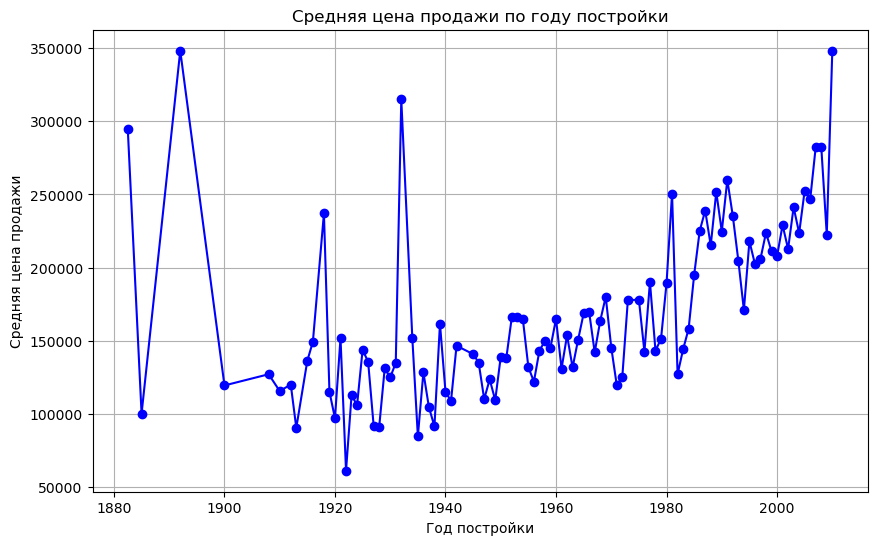

In [37]:
import matplotlib.pyplot as plt
if 'YearBuilt' in house_data.columns:
    year_summary = house_data.groupby('YearBuilt')['SalePrice'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(year_summary.index, year_summary.values, marker='o', linestyle='-', color='blue')
    plt.title("Средняя цена продажи по году постройки")
    plt.xlabel("Год постройки")
    plt.ylabel("Средняя цена продажи")
    plt.grid()
    plt.show()